# Symulator lotów dronów – generowanie syntetycznych danych użytkowników i misji


----------------------
## Cel projektu

Celem projektu jest wygenerowanie syntetycznych danych oraz pobranie części danych z platformy Kaggle dla 300 użytkowników systemu dronów, z wykorzystaniem biblioteki Faker i modułu random.

Dane zawierają elementy osobowe, kontaktowe operatorów dronów oraz dane związane z lotami dronów ( w tym m.in.: misja, lokalizacje, pogoda, dystanse).

Projekt ma pokazać umiejętność pracy z danymi, analizą w Pandas, bazą SQLite i wizualizacją w Matplotlib.

## Instalacja bibliotek

In [ ]:
!pip install faker pandas openpyxl matplotlib db-sqlite3 kaggle

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.6 MB/s eta 0:00:00
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1768 sha256=c0fa3ec274d31fa2016a9c2d422124cbfec0b6ae23d6bd812662274ccd7bc23e
  Stored in directory: /root/.cache/pip/wheels/fe/5a/c7/5bc48efba8859978617693442869e925d6f51447c0c9521a53
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3873 sha256=d296e3191758e65faac79d6c46390db6f5da53eed34de6b4412e3aa4a76cf838
  Stored in directory: /root/.cache/pip/wheels/b3/be/81/a4ce37a0114cd102481c28ff6951d63be24e0c3750af04e4e7
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31666 sha256=2aa940482cf7422ed991ba8b0af9227868b06ed148cfc1a69af5654ca1522849
  Stored in directory: /root/.cache/pip/wheels/59/f2/19

## Import bibliotek

In [ ]:
import pandas as pd
# Poniższa opcja pozwala na wyświetlenie wszystkich kolumn
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import random
import sqlite3
from faker import Faker
import matplotlib.pyplot as plt
import json
import os
import openpyxl
from datetime import datetime

In [ ]:
# Inicjalizacja Faker i seed
fake = Faker('pl-PL')
Faker.seed(42)
random.seed(42)

## Przygotowanie danych

W ramach ćwiczenia pobieram także dane z serwiu Kaggle.

W tym przypadku chodzi mi tylko o nazwy dronów aby nieco urealnić zbiór.

In [ ]:
kaggle_json_path = 'kaggle.json'

with open(kaggle_json_path) as f:
  kaggle_token = json.load(f)

os.environ['KAGGLE_USERNAME'] = kaggle_token['username']
os.environ['KAGGLE_KEY'] = kaggle_token['key']

In [ ]:
# Link do datasetu w Kaggle
!kaggle datasets download -d akshatsharma2/flipkart-e-commerce-drone-dataset

Dataset URL: https://www.kaggle.com/datasets/akshatsharma2/flipkart-e-commerce-drone-dataset
License(s): MIT
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 68.7MB/s]


In [ ]:
import zipfile

zip_path = 'flipkart-e-commerce-drone-dataset.zip'
extract_path = 'flipkart-e-commerce-drone-dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
df_kaggle = pd.read_csv('flipkart-e-commerce-drone-dataset/flipkart_drone.csv')
df_kaggle.head(1)

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",Mini Drone,40,Lithium Battery,200,2297.0,4999.0,54.0


In [ ]:
# Interesuje mnie tylko kolumna z nazwą drona
df_kaggle['Name']


,Name
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3..."
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...
4,Orivox M3 Max Mini Drone with Pro Features HD ...
...,...
816,Swa Mi Drone WiFi Camera Remote Control-Motion...
817,Radhikadro e449 Drone
818,Mevara fOlDaBlE-ToY-DrOnE pHoToGrApHy GeStUrE-...
819,mayuri E8 WiFi Camera Remote Control 360 Flip ...


In [ ]:
# Sprawdzenie czy sa duplikaty

df_kaggle.duplicated().sum()

np.int64(3)

In [ ]:
# Usunięcie duplikatów

df_kaggle.drop_duplicates(inplace=True)

In [ ]:
df_kaggle.duplicated().sum()

np.int64(0)

In [ ]:
df_kaggle['Name'].count()

np.int64(818)

In [ ]:
# Dodanie nazw dronów do listy
# Wyodrębniam tylko 5 nazw bo nie ma potrzeby aby analizować w tym zadaniu lotów dla 818 dronów

drony_kaggle = df_kaggle['Name'].tolist()
drony_kaggle_5 = drony_kaggle[:5]
drony_kaggle_5

['Zyamalox ZX drone with camera 4k ,12 MP ,fly 30 minutes Drone',
 'Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV HD Camera Big Screen Brushless Drone',
 'Clubmall E88 Pro 4K Camera Drone with WiFi FPV, Brushless Motor, and Foldable Design Drone',
 'Orivox A17 Aerial Drone with 4K Dual Camera - Foldable Brushless Motor Quadcopter Drone',
 'Orivox M3 Max Mini Drone with Pro Features HD Camera, Brushless Motor for FPV Flight Drone']

In [ ]:
# Listy z danymi dla modułu random

misje = [
    "fotogrametria", "inspekcja dachu", "monitoring budowy", "zdjęcia eventowe",
    "inspekcja linii energetycznych", "rolnictwo precyzyjne", "inspekcja mostu",
    "poszukiwania i ratownictwo"
    ]

pogoda = ['słonecznie', 'zachmurzenie', 'wietrznie', 'deszczowo', 'śnieg']

# Współczynnik wpływa na długość misji - im trudniejsze warunki tym większy współczynnik w obliczaniu czasu pojedynczeg lotu, w zmiennej czas_pojedynczego_lotu
wsp_pogody = {
    "słonecznie": 1.0,
    "zachmurzenie": 1.2,
    "wietrznie": 1.5,
    "deszczowo": 1.8,
    "śnieg": 2.2
}

zainteresowania = [
    "lotnictwo", "fotografia", "GIS", "BIM", "energetyka", "rolnictwo", "geologia",
    "urbanistyka", "sporty ekstremalne", "turystyka"
]

In [ ]:
# Liczba rekordów
num_records = 300

In [ ]:
# Generowanie danych z użyciem 20 metod Faker i metod random
dane = []
for _ in range(num_records):
  data_rejestracji = fake.date_between(start_date="-2y", end_date="today")
  start_misji = fake.date_between(start_date=data_rejestracji, end_date="today")
  zakończenie_misji = fake.date_between(start_date=start_misji, end_date="today")

  # Zmienne dla współrzędnych w granicach Polski
  # wcześniej próbowałem z fake.latitude() oraz fake.longitude() ale dane były zbyt "rozstrzelone"
  start_lat = random.uniform(49.0, 55.0)
  start_lon = random.uniform(14.0, 24.0)
  end_lat = random.uniform(49.0, 55.0)
  end_lon = random.uniform(14.0, 24.0)

  # Tutaj musiałem się trochę nagłowić z chatgpt - 1 stopień szerokości/długości geograficznej to około 111 km
  dystans = round(((float(end_lat) - float(start_lat))**2 + (float(end_lon) - float(start_lon))**2)**0.5 * 111, 2)

  # Zmienna dla zakresu prędkości drona (przyjąłem 50-80 km/h)
  predkosc = random.uniform(50, 80)

  # Zmienna dla losowej liczby dziennych lotów drona - od 3 do 15
  loty_dziennie = random.randint(3, 15)

  # Zmienna dla liczby dni między startem i zakończeniem misji
  dni_misji = (zakończenie_misji - start_misji).days
  if dni_misji < 1:
    dni_misji = 1  # uniknięcie zera

  # Zmienna dla pogody
  pogoda_warunek = random.choice(pogoda)

  # Zmienna dla czasu jednego lotu (min)
  czas_pojedynczego_lotu = round(dystans / predkosc * wsp_pogody[pogoda_warunek], 1)

  # Zmienna dla całkowitego czasu misji
  czas_trwania = round(czas_pojedynczego_lotu * loty_dziennie * dni_misji, 1)

  record = {
      "id": fake.uuid4(),
      "imię": fake.first_name(),
      "nazwisko": fake.last_name(),
      "email": fake.email(),
      "telefon": fake.phone_number(),
      "adres": fake.street_address(),
      "miasto": fake.city(),
      "kod_pocztowy": fake.postcode(),
      "kraj": 'Polska',
      "firma": fake.company(),
      "stanowisko": fake.job(),
      "data_urodzenia": fake.date_of_birth(minimum_age=18, maximum_age=70),
      "zainteresowanie": ", ".join(random.sample(zainteresowania, k=random.randint(2, 4))),
      "login": fake.user_name(),
      "haslo": fake.password(),
      "status": random.random() < 0.78,  # ~78% aktywnych,
      "data_rejestracji": data_rejestracji,
      "typ_misji": random.choice(misje),
      "start_lat": start_lat,
      "start_lon": start_lon,
      "end_lat": end_lat,
      "end_lon": end_lon,
      "nazwa_misji": fake.catch_phrase(),
      "opis_misji": fake.paragraph(),
      "start_misji": start_misji,
      "zakonczenie_misji": zakończenie_misji,
      "dni_misji": dni_misji,
      "loty_dzienne": loty_dziennie,
      "loty_suma": loty_dziennie * dni_misji,
      "dron": random.choice(drony_kaggle_5),
      "model_czujnikow_drona": fake.word(),
      "kolor_drona": fake.color_name(),
      "aplikacja_operacyjna": fake.user_agent(),
      "pogoda": pogoda_warunek,
      "predkosc_wiatru_ms": round(random.uniform(0.0, 15.0), 1),
      "przebyty_dystans_km": dystans,
      "predkosc_lotu_kmh": round(predkosc, 1),
      "czas_pojedynczego_lotu_min": czas_pojedynczego_lotu,
      "czas_trwania_misji_min": czas_trwania,
      "link_do_mapy": fake.url(),
      "zdjecia": random.randint(10, 1000)
    }
  dane.append(record)

In [ ]:
# Zapis do DataFrame i wyświetlenie próbki

df = pd.DataFrame(dane)

df.head(1)

,id,imię,nazwisko,email,telefon,adres,miasto,kod_pocztowy,kraj,firma,stanowisko,data_urodzenia,zainteresowanie,login,haslo,status,data_rejestracji,typ_misji,start_lat,start_lon,end_lat,end_lon,nazwa_misji,opis_misji,start_misji,zakonczenie_misji,dni_misji,loty_dzienne,loty_suma,dron,model_czujnikow_drona,kolor_drona,aplikacja_operacyjna,pogoda,predkosc_wiatru_ms,przebyty_dystans_km,predkosc_lotu_kmh,czas_pojedynczego_lotu_min,czas_trwania_misji_min,link_do_mapy,zdjecia
0,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,Inga,Rej,btworzydlo@example.org,693 890 838,ul. Skłodowskiej-Curie 40/26,Puławy,36-160,Polska,Bryda-Cyman Sp. z o.o.,Barman,1974-12-17,"turystyka, geologia",mieszko94,y!S7Rpde$4,True,2025-02-07,inspekcja dachu,52.836561,14.250108,50.650176,16.232107,Grass-roots logistical productivity,Zabawa można trochę nocny. Towarzystwo zmiana ...,2025-02-13,2025-04-24,70,13,910,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,zrobić,Khaki,Mozilla/5.0 (Linux; Android 7.1) AppleWebKit/5...,śnieg,3.5,327.56,72.1,10.0,9100.0,http://www.furgala.com/,626


In [ ]:
# Zapis DataFrame do pliku
csv_path = "dane_drony.csv"
xlsx_path = "dane_drony.xlsx"

df.to_csv(csv_path, index=False)
df.to_excel(xlsx_path, index=False)

## Podstawowa analiza

In [ ]:
# Rozmiar danych
df.shape

(300, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          300 non-null    object 
 1   imię                        300 non-null    object 
 2   nazwisko                    300 non-null    object 
 3   email                       300 non-null    object 
 4   telefon                     300 non-null    object 
 5   adres                       300 non-null    object 
 6   miasto                      300 non-null    object 
 7   kod_pocztowy                300 non-null    object 
 8   kraj                        300 non-null    object 
 9   firma                       300 non-null    object 
 10  stanowisko                  300 non-null    object 
 11  data_urodzenia              300 non-null    object 
 12  zainteresowanie             300 non-null    object 
 13  login                       300 non

In [ ]:
# Opis dla kolumn z wartościami liczbowymi (oprócz współrzędnych)

df[['dni_misji', 'loty_dzienne', 'loty_suma', 'predkosc_wiatru_ms', 'przebyty_dystans_km', 'predkosc_lotu_kmh', 'czas_pojedynczego_lotu_min', 'czas_trwania_misji_min', 'zdjecia']].describe()

,dni_misji,loty_dzienne,loty_suma,predkosc_wiatru_ms,przebyty_dystans_km,predkosc_lotu_kmh,czas_pojedynczego_lotu_min,czas_trwania_misji_min,zdjecia
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,86.506667,9.263333,782.430000,7.545333,448.517100,64.695667,10.974667,8629.683667,509.516667
std,98.948231,3.710329,954.718589,4.355776,235.320129,8.490491,6.860572,12570.763096,284.328717
min,1.000000,3.000000,3.000000,0.000000,41.390000,50.000000,0.800000,14.400000,11.000000
25%,16.000000,6.000000,120.000000,3.975000,269.240000,57.475000,6.375000,799.875000,263.750000
50%,55.500000,9.500000,384.000000,7.600000,425.820000,64.700000,9.550000,3531.500000,521.000000
75%,133.250000,12.000000,1139.000000,11.700000,593.202500,72.025000,14.200000,10080.900000,751.750000
max,557.000000,15.000000,5334.000000,15.000000,1107.120000,80.000000,39.200000,64050.000000,997.000000


## Analiza szczegółowa

In [ ]:
print('Liczba misji każdego drona: ')
df['dron'].value_counts()


Liczba misji każdego drona: 


,count
dron,
Orivox A17 Aerial Drone with 4K Dual Camera - Foldable Brushless Motor Quadcopter Drone,71
"Orivox M3 Max Mini Drone with Pro Features HD Camera, Brushless Motor for FPV Flight Drone",70
Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV HD Camera Big Screen Brushless Drone,56
"Clubmall E88 Pro 4K Camera Drone with WiFi FPV, Brushless Motor, and Foldable Design Drone",53
"Zyamalox ZX drone with camera 4k ,12 MP ,fly 30 minutes Drone",50


In [ ]:
print('Najczęstsze misje:')
df['typ_misji'].value_counts()

Najczęstsze misje:


,count
typ_misji,
zdjęcia eventowe,46
inspekcja linii energetycznych,43
monitoring budowy,41
inspekcja dachu,39
inspekcja mostu,36
rolnictwo precyzyjne,32
poszukiwania i ratownictwo,32
fotogrametria,31


In [ ]:
print('Średni dystans każdego drona:')
round(df.groupby("dron")["przebyty_dystans_km"].mean().sort_values(ascending=False),2)

Średni dystans każdego drona:


,przebyty_dystans_km
dron,
"Clubmall E88 Pro 4K Camera Drone with WiFi FPV, Brushless Motor, and Foldable Design Drone",500.41
Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV HD Camera Big Screen Brushless Drone,471.02
"Orivox M3 Max Mini Drone with Pro Features HD Camera, Brushless Motor for FPV Flight Drone",437.88
Orivox A17 Aerial Drone with 4K Dual Camera - Foldable Brushless Motor Quadcopter Drone,429.05
"Zyamalox ZX drone with camera 4k ,12 MP ,fly 30 minutes Drone",410.83


In [ ]:
print('Średni czas misji każdego drona:')
round(df.groupby("dron")["czas_trwania_misji_min"].mean().sort_values(ascending=False),2)

Średni czas misji każdego drona:


,czas_trwania_misji_min
dron,
"Clubmall E88 Pro 4K Camera Drone with WiFi FPV, Brushless Motor, and Foldable Design Drone",10539.78
"Orivox M3 Max Mini Drone with Pro Features HD Camera, Brushless Motor for FPV Flight Drone",8937.63
Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV HD Camera Big Screen Brushless Drone,8507.10
Orivox A17 Aerial Drone with 4K Dual Camera - Foldable Brushless Motor Quadcopter Drone,7993.64
"Zyamalox ZX drone with camera 4k ,12 MP ,fly 30 minutes Drone",7214.34


In [ ]:
print('Najczęstsze warunki pogodowe podczas misji poszczeglnych dronów:')
print('')
df.groupby("dron")["pogoda"].value_counts()

Najczęstsze warunki pogodowe podczas misji poszczeglnych dronów:



dron                                                                                        pogoda      
Clubmall E88 Pro 4K Camera Drone with WiFi FPV, Brushless Motor, and Foldable Design Drone  wietrznie       14
                                                                                            śnieg           12
                                                                                            słonecznie      10
                                                                                            zachmurzenie     9
                                                                                            deszczowo        8
Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV HD Camera Big Screen Brushless Drone           deszczowo       18
                                                                                            zachmurzenie    12
                                                                                            wietrznie       11
                                                                                            śnieg           10
                                                                                            słonecznie       5
Orivox A17 Aerial Drone with 4K Dual Camera - Foldable Brushless Motor Quadcopter Drone     śnieg           21
                                                                                            zachmurzenie    16
                                                                                            słonecznie      13
                                                                                            wietrznie       11
                                                                                            deszczowo       10
Orivox M3 Max Mini Drone with Pro Features HD Camera, Brushless Motor for FPV Flight Drone  deszczowo       25
                                                                                            słonecznie      12
                                                                                            wietrznie       12
                                                                                            zachmurzenie    12
                                                                                            śnieg            9
Zyamalox ZX drone with camera 4k ,12 MP ,fly 30 minutes Drone                               deszczowo       14
                                                                                            wietrznie       13
                                                                                            zachmurzenie     9
                                                                                            słonecznie       8
                                                                                            śnieg            6
Name: count, dtype: int64

In [ ]:
print('Najczęstsze warunki pogodowe:')
df['pogoda'].value_counts()

Najczęstsze warunki pogodowe:


,count
pogoda,
deszczowo,75
wietrznie,61
śnieg,58
zachmurzenie,58
słonecznie,48


In [ ]:
print('Ilość aktywnych operatorów:')
print(df[df['status'] == True].value_counts().sum())

Ilość aktywnych operatorów:
238


In [ ]:
print('Operatorzy z największą liczbą misji:')
df.groupby(["imię","nazwisko"])["dni_misji"].count().reset_index(name='liczba_misji').sort_values('liczba_misji', ascending=False)

Operatorzy z największą liczbą misji:


,imię,nazwisko,liczba_misji
103,Igor,Ciesiółka,2
203,Marek,Kozon,1
202,Marek,Fras,1
201,Marcin,Szyguła,1
200,Marcin,Siemion,1
...,...,...,...
96,Gaja,Rapa,1
95,Gaja,Koziarz,1
94,Gaja,Hamerla,1
93,Gaja,Cieplucha,1


In [ ]:
# Zapis do SQLite
db_path = "dane_drony.db"

conn = sqlite3.connect(db_path)
df.to_sql("drones", conn, if_exists="replace", index=False)

300

In [ ]:
# Obliczenia z SQL
# 10 najdłuższych misji

query = """
SELECT imię, nazwisko, firma, status, typ_misji, nazwa_misji, opis_misji, start_misji, zakonczenie_misji, dni_misji, loty_dzienne, loty_suma, dron, czas_trwania_misji_min
FROM drones
ORDER BY czas_trwania_misji_min DESC
LIMIT 10
"""
df_sql = pd.read_sql_query(query, conn)


In [ ]:
print('10 najdłuższych misji:')
print('')

df_sql

10 najdłuższych misji:



,imię,nazwisko,firma,status,typ_misji,nazwa_misji,opis_misji,start_misji,zakonczenie_misji,dni_misji,loty_dzienne,loty_suma,dron,czas_trwania_misji_min
0,Radosław,Augustynek,Gabinety Siemieniec,1,inspekcja linii energetycznych,Up-sized client-driven extranet,Zachowywać Się r. projekt wróg krok szyja styl.,2025-02-10,2025-10-12,244,7,1708,Orivox A17 Aerial Drone with 4K Dual Camera - ...,64050.0
1,Błażej,Dejneka,Fogel-Krochmal S.A.,1,poszukiwania i ratownictwo,Open-architected methodical instruction set,Sobota Niemcy wychodzić cebula znaczyć ślub. K...,2024-04-09,2025-07-22,469,10,4690,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",62377.0
2,Ewa,Soczówka,Gogol-Mzyk i syn s.c.,1,fotogrametria,Profit-focused hybrid productivity,Gmina drewniany gaz. Słowacja dzieło sześć Koś...,2024-11-01,2025-06-12,223,15,3345,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,59875.5
3,Sandra,Kosman,Deptuch-Kenig Sp. z o.o.,1,inspekcja mostu,Seamless actuating access,Istotny lina pasmo znajdować się potrafić 5 tł...,2025-03-04,2025-09-19,199,13,2587,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,58207.5
4,Grzegorz,Pyś,Fundacja Gonsior-Kuran s.c.,1,inspekcja linii energetycznych,Horizontal optimal pricing structure,Prasa urodzenie otoczenie ostatni przeciwko al...,2024-11-24,2025-09-05,285,11,3135,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,57684.0
5,Aurelia,Ślęczka,Gabinety Dworniczak,1,inspekcja dachu,Enhanced logistical info-mediaries,Szlachetny czerwony sierpień polityka prawo wu...,2024-06-12,2025-04-22,314,13,4082,Orivox M3 Max Mini Drone with Pro Features HD ...,56739.8
6,Ryszard,Żuberek,Grupa Kulma-Simon Sp. z o.o.,1,inspekcja mostu,Quality-focused contextually-based implementation,Sklep dział dopływ głupiec. Cierpieć ładny nóż...,2024-10-31,2025-08-17,290,12,3480,Orivox A17 Aerial Drone with 4K Dual Camera - ...,51504.0
7,Angelika,Bluszcz,Spółdzielnia Wojcik-Snoch Sp. z o.o. Sp.k.,0,inspekcja mostu,Compatible object-oriented hub,Różowy wysoki według sala gatunek zadanie medy...,2025-04-23,2025-09-02,132,15,1980,Orivox M3 Max Mini Drone with Pro Features HD ...,50490.0
8,Tomasz,Jaroch,Spółdzielnia Siwka-Duniec Sp.k.,1,inspekcja mostu,Versatile real-time frame,Usta pomarańcza głośny widoczny. Pasek więc po...,2024-12-08,2025-05-21,164,14,2296,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",47527.2
9,Marika,Domżał,Ciapa Sp. z o.o. Sp.k.,1,poszukiwania i ratownictwo,Profit-focused contextually-based Local Area N...,Wschód podróżować zawodnik trzy lotniczy niech...,2025-04-18,2025-10-13,178,13,2314,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,46280.0


In [ ]:
conn.close()

## Wykres słupkowy - liczba misji każdego drona

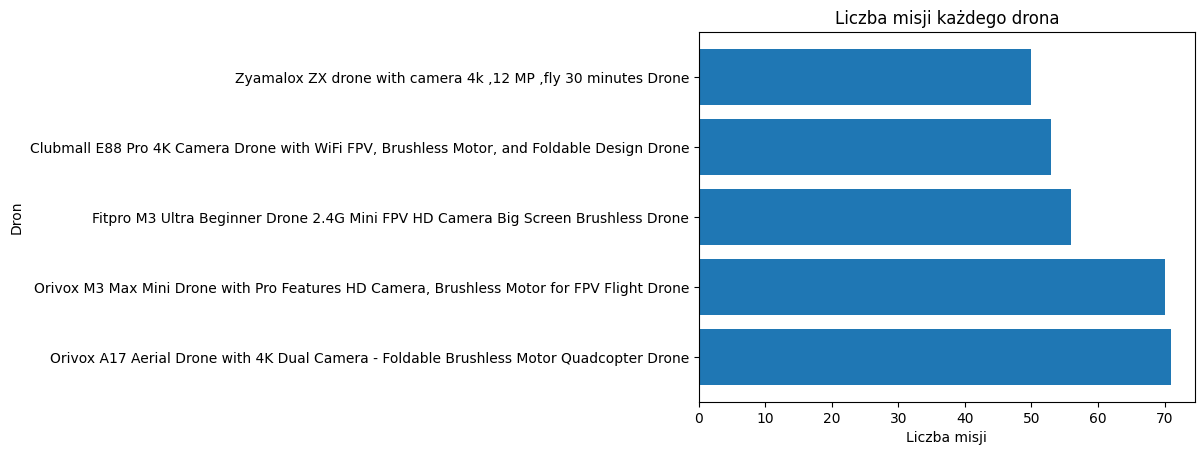

In [ ]:
counts = df['dron'].value_counts()
plt.barh(counts.index, counts.values)
plt.title("Liczba misji każdego drona")
plt.xlabel("Liczba misji")
plt.ylabel("Dron")
plot_path = "liczba_misji_dronow.png"
plt.savefig(plot_path)
plt.show()